In [26]:
import pandas as pd
import numpy as np
ds = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
ds

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [27]:
ds.shape

(397, 6)

In [28]:
ds.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

<AxesSubplot:>

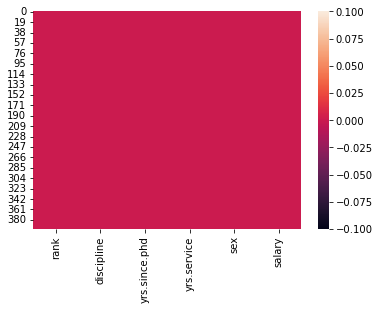

In [29]:
import seaborn as sns
sns.heatmap(ds.isnull())

In [30]:
ds.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

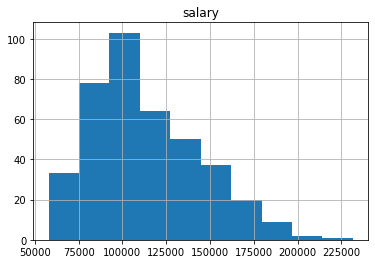

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
ds['salary'].hist(grid = True)                     
plt.title('salary')
plt.show()

In [32]:
ds.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

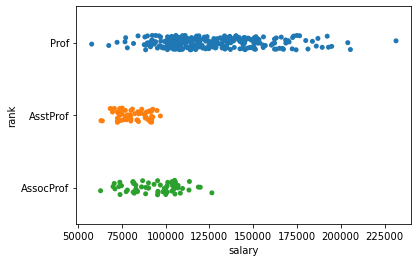

In [33]:
sns.stripplot(x="salary",y="rank",data=ds)
plt.show()

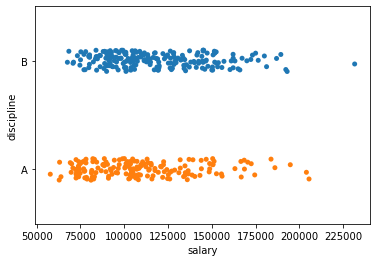

In [34]:
sns.stripplot(x="salary",y="discipline",data=ds)
plt.show()

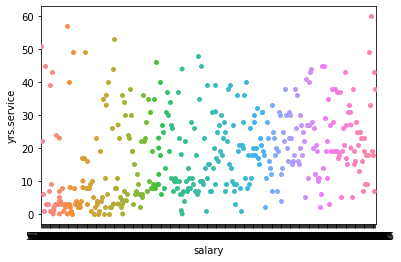

In [35]:
sns.stripplot(x="salary",y="yrs.service",data=ds)
plt.show()

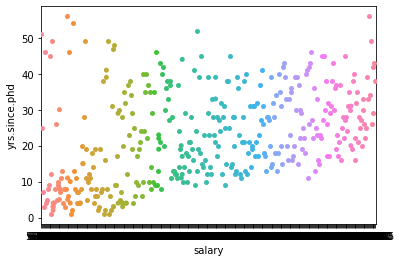

In [36]:
sns.stripplot(x="salary",y="yrs.since.phd",data=ds)
plt.show()

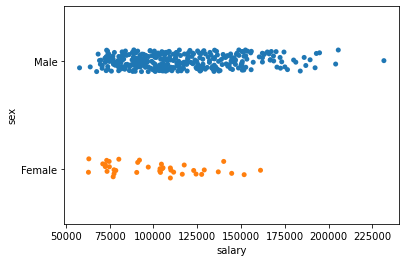

In [37]:
sns.stripplot(x="salary",y="sex",data=ds)
plt.show()

In [38]:
ds.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [39]:
ds.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

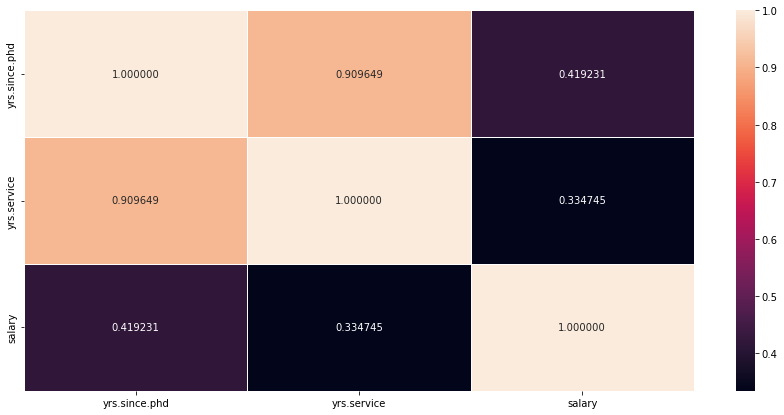

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(ds.corr(),annot=True, linewidths=1,fmt='2f')

year of service is 33% correlated

year since phd is 41% correleated

In [41]:
import warnings
warnings.filterwarnings('ignore')

yrs.since.phd    AxesSubplot(0.125,0.657941;0.775x0.222059)
yrs.service      AxesSubplot(0.125,0.391471;0.775x0.222059)
salary              AxesSubplot(0.125,0.125;0.775x0.222059)
dtype: object

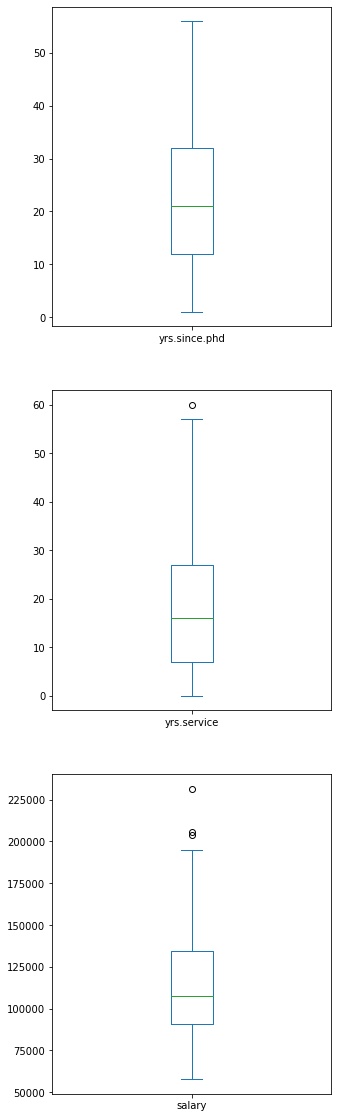

In [43]:
ds.plot(kind='box',subplots=True,layout=(3,1),figsize=(5,20))

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['rank','discipline','sex']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))
ds   

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


rank                AxesSubplot(0.125,0.657941;0.352273x0.222059)
discipline       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
yrs.since.phd       AxesSubplot(0.125,0.391471;0.352273x0.222059)
yrs.service      AxesSubplot(0.547727,0.391471;0.352273x0.222059)
sex                    AxesSubplot(0.125,0.125;0.352273x0.222059)
salary              AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

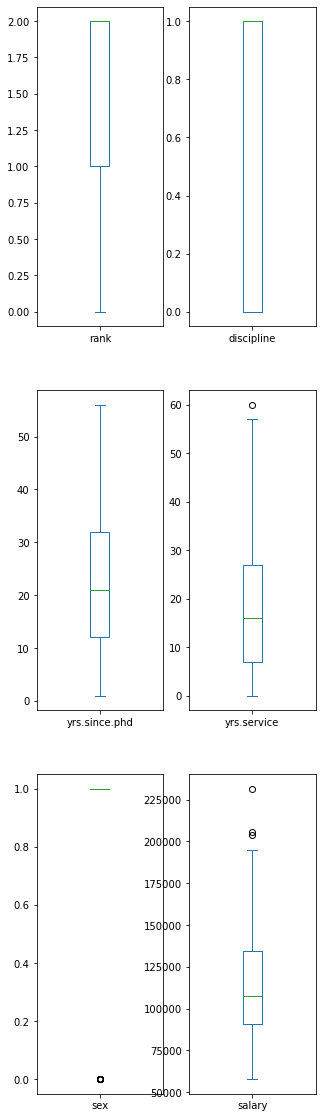

In [45]:
ds.plot(kind='box',subplots=True,layout=(3,2),figsize=(5,20))

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
z.shape
threshold=3
#index number
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [48]:
len(np.where(z>3)[0])

43

In [49]:
df=ds[(z<3).all(axis=1)]
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [50]:
a=(397-354)/397*100
print(a,'% data loses while removing the outliers')

10.831234256926953 % data loses while removing the outliers


In [51]:
y=df['salary']
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [79]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [86]:
x=df.drop(['salary'],axis=1)
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [87]:
x.skew()

rank            -1.241757
discipline      -0.182308
yrs.since.phd    0.234156
yrs.service      0.529464
sex              0.000000
dtype: float64

In [88]:
from sklearn.preprocessing import power_transform        #removing skewness
       
df_new = pd.DataFrame(x, columns = x.columns)

In [89]:
df_new.skew()

rank            -1.241757
discipline      -0.182308
yrs.since.phd    0.234156
yrs.service      0.529464
sex              0.000000
dtype: float64

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lm=LinearRegression()
maxr2score=0
for i in range (0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2>maxr2score:
        maxr2score= r2
        maxRS= i

In [91]:
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.5325817682135239 on Random State 368


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 368)

In [94]:
LR = LinearRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print (r2_score(y_test, predlr))
print (mean_squared_error(y_test, predlr))

0.5325817682135239
378289484.8662526
